# AutoML from Google

## Using the online interface

The dataset is the breast cancer dataset. 

AutoML requires 1000 rows at minimum so I concatenated the original dataset together (just over 500 rows).

A column header row is expected. 

Periods and spaces are not allowed in column names. 

Blank column names are not allowed.

### Export the data

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import sys

In [2]:
bc1 = sklearn.datasets.load_breast_cancer(return_X_y=False)
bc2 = sklearn.datasets.load_breast_cancer(return_X_y=False)

In [3]:
names = bc1['feature_names']
names = [w.replace(' ', '_') for w in names]
names

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [4]:
bcdf1 = pd.DataFrame(bc1['data'],columns=names)
bcdf1['target'] = bc1['target']

bcdf2 = pd.DataFrame(bc2['data'],columns=names)
bcdf2['target'] = bc2['target']

In [5]:
bcdf3 = pd.concat([bcdf1,bcdf2])

In [6]:
bcdf3.to_csv('../data/raw/breast_cancer_2x.csv', index=False)

### Screen shots

I cannot see a way to find out which algorithms were used in the final model or if it is an ensemble.

Training took 0.886 node hours and 54 mins wall clock to complete.

#### Model output

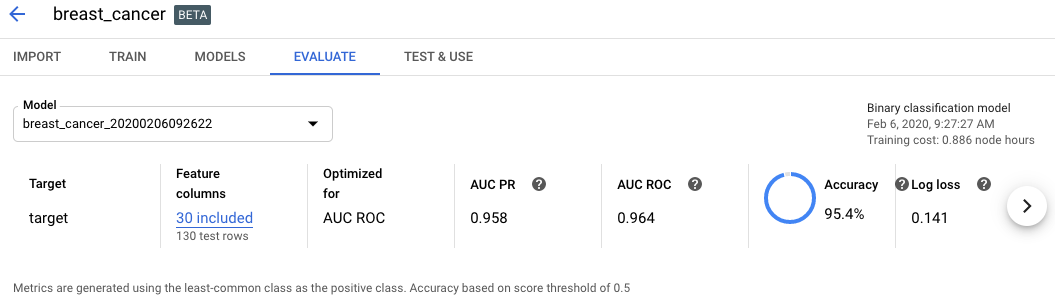

In [7]:
from IPython.display import Image
Image(filename='images/model1.png')

#### Explanations

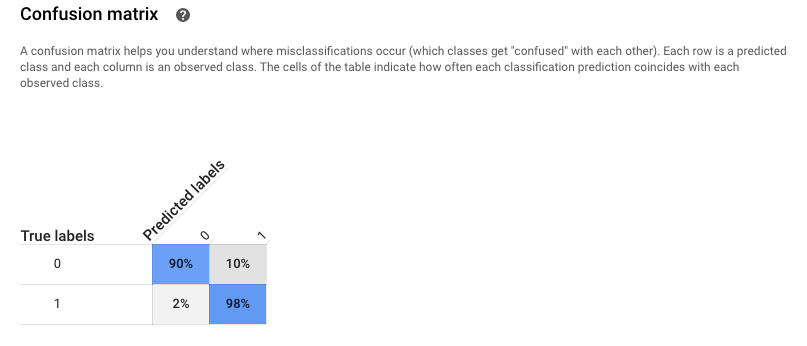

In [8]:
from IPython.display import Image
Image(filename='images/model2.png')

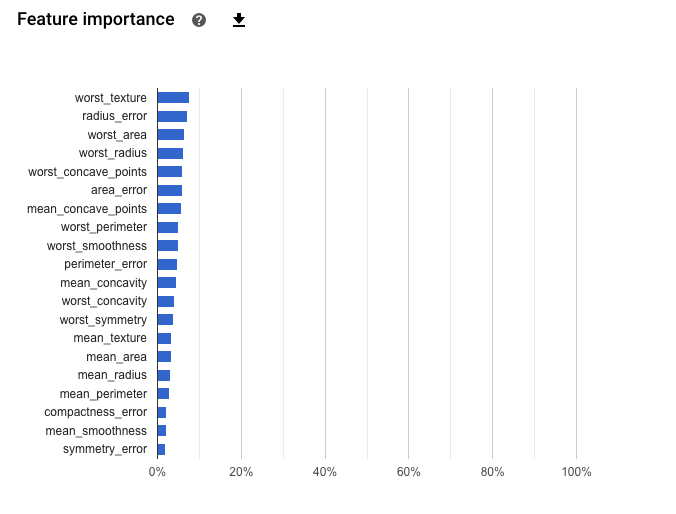

In [9]:
from IPython.display import Image
Image(filename='images/model3.png')

## Via notebook commands

In [10]:
#ensure python and your executable are the same

!type python
sys.executable

python is /usr/local/anaconda/bin/python


'/usr/local/anaconda/bin/python'

In [11]:
#install automl

import subprocess

completed = subprocess.run(['sudo', """/usr/local/anaconda/bin/python""", '-m', 'pip', \
                            'install', 'google-cloud-automl'], \
                           stdout=subprocess.PIPE,)
print(completed.stdout.decode('utf-8'))

  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-py3-none-any.whl size=77593 sha256=424c4ec51122a1be10957d70caa3ef7e984d58270bcee4752489b501efca11dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-itzhyc8t/wheels/35/8d/af/a922cb18800b31fadac3523cadf6c1efdf233b788fe7a4da70
Successfully built googleapis-common-protos



In [12]:
from google.cloud import automl_v1beta1 as automl

#### The following is still a WIP - connecting to GCP from a remote notebook

In [13]:
#client = automl.TablesClient(project='mineral-catwalk-267400', region='us-central1')

Follow instructions here to setup a GCP service account: https://cloud.google.com/docs/authentication/getting-started

Also do enable Cloud AutoML and Storage APIs here: https://console.cloud.google.com/flows/enableapi?apiid=storage-component.googleapis.com,automl.googleapis.com,storage-api.googleapis.com&redirect=https://console.cloud.google.com&_ga=2.32030718.-119742050.1571893794

#### Hard-code accuracy for now until we get the remote connection working

In [14]:
import json
with open('../dominostats.json', 'w') as f:
    f.write(json.dumps( {"BC_ACC": .954}))